# Quantum Computing with Qiskit
In this small Notebook I will be taking my first steps with IBMs Quantum Experience and qiskit.  
## 1. The Basics
First lets start with somethin not alien to normal computing.

In [ ]:
!pip install qiskit

In [7]:
import qiskit as q
from qiskit import IBMQ
import time

### 1.1 Composing the first circuit
Like normal computer, quantum ones are based on circuits.  
A Circuit is composed of gates, the most basic beeing the "not" and "controlled not" gate.  
By combining several of these gates and going threw them one after another we can do even the most complex computations.

In [3]:
# 2 q-bits and 2 classical bits
circuit = q.QuantumCircuit(2,2)

In [4]:
# q-bits start as 0; flip 1. qubit to 1
circuit.x(0)

# Apply c-not (controlled not) gate to 2nd q-bit; c-not: flip q-bit to 1 if other q-bit is a 1, otherwise do nothing
circuit.cx(0, 1)

# Write value of first q-bit to first classical bit and 2nd to 2nd:
circuit.measure([0,1], [0,1])

# draw circuit:
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═

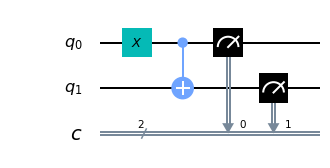

In [5]:
# draw as matplotlib 
circuit.draw(output = "mpl")

### 1.2 Setting up the account

In [19]:
# The code was removed by Watson Studio for sharing.

In [10]:
# JUST FOR INITIAL SETUP: Connect to IBM Quantum Experience Account
IBMQ.save_account(token)

In [11]:
# Use the following for future notebooks, as the connection should be saved for the future:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

### 1.3 Execute circuit

In [12]:
# Next get an overview of the quees for different available quantum computer:
provider = IBMQ.get_provider("ibm-q")

# Each p stands for one Quantum Computer.
for backend in provider.backends():
    # One availabe Quantum Computer is only simulated and hence has no set number of qubits
    try:
        n_qubits = len(backend.properties().qubits)
        
    except:
        n_qubits = "simulated"
        
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {n_qubits} qubits")

ibmq_qasm_simulator has 0 queued and simulated qubits
ibmqx2 has 3 queued and 5 qubits
ibmq_16_melbourne has 7 queued and 15 qubits
ibmq_vigo has 1 queued and 5 qubits
ibmq_ourense has 6 queued and 5 qubits
ibmq_london has 0 queued and 5 qubits
ibmq_burlington has 1 queued and 5 qubits
ibmq_essex has 7 queued and 5 qubits
ibmq_armonk has 0 queued and 1 qubits
ibmq_rome has 9 queued and 5 qubits


In [13]:
from qiskit.tools.monitor import job_monitor

# select backend with minimal length queue and sufficient number of qubits
backend = provider.get_backend("ibmq_london")

# Shots equals the number of times the circuit gets run. This is necessary, as quantum computing is based on probability in the end.
# The more shots you take the more certain the cummulative result will be.
job = q.execute(circuit, backend=backend, shots=300)
job_monitor(job)

Job Status: job has successfully run


### 1.4 Result

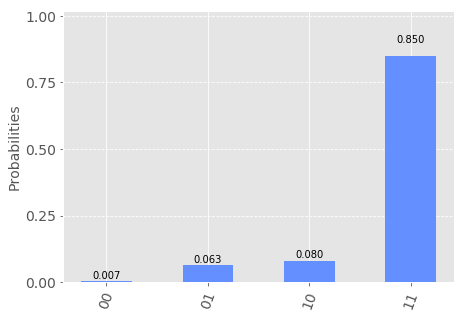

In [14]:
from qiskit.visualization import plot_histogram
from matplotlib import style
style.use("ggplot")

result = job.result()
counts = result.get_counts()

plot_histogram([counts])

As one would expect, the most frequent outcome of the computation is 1 1.  
The other outcomes are referred to as quantum noise, meaning the qubits states have been messed with by its surrounding, thus changing the outcome.  
This shows nicel why we needed to take many shots ( as we defined in step 4) to be more certain of a correct result.  
Correcting for such errors is still a huge problem in Quantum computing and prohibiting us from constructing more complex quantum machines.

## 2. Superposition and Entanglement
Now that we have a basic idea on how to work with qiskit lets take the next step and get into what really sets appart quantum from classical computing. .  
In contrast to a bit, a qubit can be zero and one at the same time. This state is called superposition and is one of two core principals of quantum computing.  
The second is entanglement. Once a qubit is in superposition we can entangle it with another.  
The moment we then measure either of them and it collapses to beeing either zero or one, the other will do the exactly same and match the outcome.  
So if we measure qubit a to be 0, its entangled counter part will for certain be 0 aswell.  
(This is true no matter the distance between these two particles and was referred to by Einstein as spooky action at a distance, as it is so often referenced.)  
  
So lets build a real quatum circuit next:  
1. Set qubit 0 in superposition
2. entangle it with qubit 1
3. measure  

The results should either be 0 0 or 1 1 with a 50% probability.  
As we have the problem of quantum noise though, we can also expect the results 0 1 and 1 0 with some probability. 

In [15]:
circuit = q.QuantumCircuit(2, 2)

# bring qubit 0 into superposition
circuit.h(0)

# Entangle the qubits
circuit.cx(0, 1)

circuit.measure([0, 1], [0, 1])
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═

In [16]:
# Stop execution time
start_time = time.time()

# deploy circuit to quantum computer
job = q.execute(circuit, backend=backend, shots = 500)
job_monitor(job)

duration = time.time() - start_time
print(f"{duration} seconds.")

Job Status: job has successfully run
14.514037609100342 seconds.


Today the job was finished fairly quick.  
This due to the fact, that there was no queue.

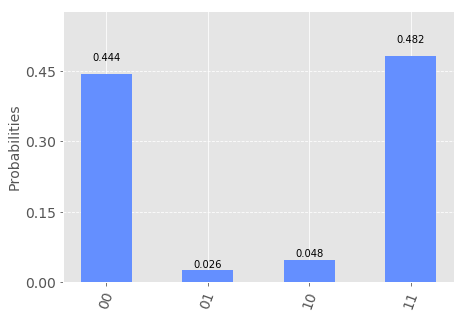

In [18]:
result = job.result()
counts = result.get_counts()

plot_histogram([counts])

As we thought, 0 0 and 1 1 occur in a distribution of nearly 50% and we can see some noise.